# Tested solutions

In [1]:
# Hide warnings if there are any
# import warnings
# warnings.filterwarnings('ignore')

1) Load VGG model <- work well

Using TensorFlow backend.








[<tf.Tensor 'input_1:0' shape=(?, 224, 224, 3) dtype=float32>];[<tf.Tensor 'predictions/Softmax:0' shape=(?, 1000) dtype=float32>];vgg16


(-0.5, 223.5, 223.5, -0.5)

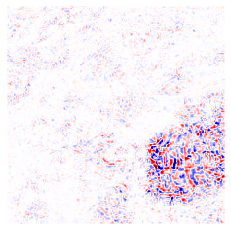

In [2]:
import os
import utils
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image

# Load an image.
image = utils.load_image(
    os.path.join("dataset/test/01_TUMOR", "1D8F_CRC-Prim-HE-02_007b.jpg_Row_151_Col_1.jpg"), 224)

# Code snippet.
plt.imshow(image/255)
plt.axis('off')
plt.savefig("readme_example_input.png")

import keras.applications.vgg16 as vgg16
model, preprocess = vgg16.VGG16(), vgg16.preprocess_input

#####################
# Strip softmax layer
import innvestigate
model = innvestigate.utils.model_wo_softmax(model)

# Create analyzer
analyzer = innvestigate.create_analyzer("integrated_gradients", model)

# Add batch axis and preprocess
x = preprocess(image[None])

# Apply analyzer w.r.t. maximum activated output-neuron
a = analyzer.analyze(x)

# Aggregate along color channels and normalize to [-1, 1]
a = a.sum(axis=np.argmax(np.asarray(a.shape) == 3))
a /= np.max(np.abs(a))

# Plot
plt.imshow(a[0], cmap="seismic", clim=(-1, 1))
plt.axis('off')

2) Run with ARA model

2.2.4


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Loaded model from disk
[<tf.Tensor 'input_1_1:0' shape=(?, 128, 128, 3) dtype=float32>];[<tf.Tensor 'main_output/Softmax:0' shape=(?, 8) dtype=float32>, <tf.Tensor 'aux_output/Softmax:0' shape=(?, 8) dtype=float32>];model_1


ValueError: The name "dense_2" is used 2 times in the model. All layer names should be unique.

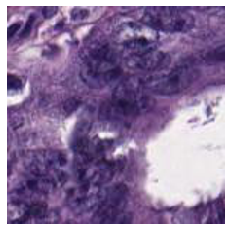

In [3]:
import os
import utils
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image

# Load an image.
image = utils.load_image(
    os.path.join("dataset/test/01_TUMOR", "1D8F_CRC-Prim-HE-02_007b.jpg_Row_151_Col_1.jpg"), 224)

# Code snippet.
plt.imshow(image/255)
plt.axis('off')
plt.savefig("readme_example_input.png")

# Get model
import keras
print(keras.__version__)

from keras.models import model_from_json
with open('model.json', 'r') as f:
    model = model_from_json(f.read())

# Load weights into the new model
model.load_weights('ara_cnn.h5')
# model = keras.Model(inputs=model.input, outputs=[model.get_layer(name='main_output').output, model.get_layer(name='aux_output').output])
print("Loaded model from disk")

#####################
# Strip softmax layer
import innvestigate
"""Creates a new model w/o the final softmax activation."""
model = innvestigate.utils.model_wo_softmax(model)

# Create analyzer
analyzer = innvestigate.create_analyzer("integrated_gradients", model)

# Add batch axis and preprocess
# x = preprocess(image[None])
x = innvestigate.utils.preprocess_images(image[None])
# x = image[None]

# Apply analyzer w.r.t. maximum activated output-neuron
a = analyzer.analyze(x)

# Aggregate along color channels and normalize to [-1, 1]
a = a.sum(axis=np.argmax(np.asarray(a.shape) == 3))
a /= np.max(np.abs(a))

# Plot
plt.imshow(a[0], cmap="seismic", clim=(-1, 1))
plt.axis('off')

3) Different way of loading model

In [4]:
# layer.get_config()['activation']

import json
with open('model.json', "r") as f:
    model_json = json.load(f)
    
# with open('model.json', 'r') as f:
#     model_json = model_from_json(f.read())

from model_utils import single_class_accuracy
model = model_from_json(model_json, custom_objects={'fn': single_class_accuracy(0)},)
model.load_weights('ara_cnn.h5')


# load weights into new model
# model = load_model('ara_cnn.h5', custom_objects={'fn': single_class_accuracy(0)})
print("Loaded model from disk")

#####################
# Strip softmax layer
import innvestigate
"""Creates a new model w/o the final softmax activation."""
model = innvestigate.utils.model_wo_softmax(model)

# Create analyzer
analyzer = innvestigate.create_analyzer("integrated_gradients", model)

# Add batch axis and preprocess
x = preprocess(image[None])

# Apply analyzer w.r.t. maximum activated output-neuron
a = analyzer.analyze(x)

# Aggregate along color channels and normalize to [-1, 1]
a = a.sum(axis=np.argmax(np.asarray(a.shape) == 3))
a /= np.max(np.abs(a))

# Plot
plt.imshow(a[0], cmap="seismic", clim=(-1, 1))
plt.axis('off')

TypeError: the JSON object must be str, bytes or bytearray, not dict

4) Compile model (configures the model for training)

In [5]:
with open('model.json', 'r') as f:
    model = model_from_json(f.read())

# load weights into new model
model.load_weights('ara_cnn.h5')
print("Loaded model from disk")

from keras.optimizers import Adam
from model_utils import single_class_accuracy
model.compile(optimizer=Adam(), loss="sparse_categorical_crossentropy", 
              loss_weights={"main_output": 0.9, "aux_output": 0.1}, metrics=["acc", single_class_accuracy(0)])

#####################
# Strip softmax layer
import innvestigate
"""Creates a new model w/o the final softmax activation."""
model = innvestigate.utils.model_wo_softmax(model)

# Create analyzer
analyzer = innvestigate.create_analyzer("integrated_gradients", model)

# Add batch axis and preprocess
x = preprocess(image[None])

# Apply analyzer w.r.t. maximum activated output-neuron
a = analyzer.analyze(x)

# Aggregate along color channels and normalize to [-1, 1]
a = a.sum(axis=np.argmax(np.asarray(a.shape) == 3))
a /= np.max(np.abs(a))

# Plot
plt.imshow(a[0], cmap="seismic", clim=(-1, 1))
plt.axis('off')

Loaded model from disk

[<tf.Tensor 'input_1_2:0' shape=(?, 128, 128, 3) dtype=float32>];[<tf.Tensor 'main_output_1/Softmax:0' shape=(?, 8) dtype=float32>, <tf.Tensor 'aux_output_1/Softmax:0' shape=(?, 8) dtype=float32>];model_1


Exception: Cannot detect activation type.

5) Create new model

In [6]:
with open('model.json', 'r') as f:
    model = model_from_json(f.read())

# load weights into new model
model.load_weights('ara_cnn.h5')

from keras.models import Model
from innvestigate.utils.keras.graph import pre_softmax_tensors
model2 = Model(inputs=model.inputs,
                              outputs=pre_softmax_tensors(model.outputs),
                              name=model.name)

#####################
# Strip softmax layer
import innvestigate
"""Creates a new model w/o the final softmax activation."""
model = innvestigate.utils.model_wo_softmax(model)

# Create analyzer
analyzer = innvestigate.create_analyzer("integrated_gradients", model)

# Add batch axis and preprocess
x = preprocess(image[None])

# Apply analyzer w.r.t. maximum activated output-neuron
a = analyzer.analyze(x)

# Aggregate along color channels and normalize to [-1, 1]
a = a.sum(axis=np.argmax(np.asarray(a.shape) == 3))
a /= np.max(np.abs(a))

# Plot
plt.imshow(a[0], cmap="seismic", clim=(-1, 1))
plt.axis('off')

[<tf.Tensor 'input_1_3:0' shape=(?, 128, 128, 3) dtype=float32>];[<tf.Tensor 'main_output_2/Softmax:0' shape=(?, 8) dtype=float32>, <tf.Tensor 'aux_output_2/Softmax:0' shape=(?, 8) dtype=float32>];model_1


Exception: Cannot detect activation type.

6) Remove layer

2.2.4
Loaded model from disk
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 64)   9472        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 32, 32, 64)   256         conv2d_1[0][0]                   
__________________________________________________________________________________________________
leaky_re_lu_1 (LeakyReLU)       (None, 32, 32, 64)   0           batch_normalization_1[0][0]      
________________________________________________________________________________

Exception: Cannot detect activation type.

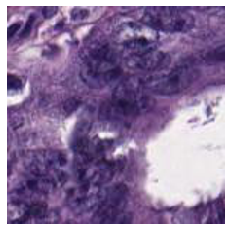

In [7]:
import os
import utils
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image

# Load an image.
image = utils.load_image(
    os.path.join("dataset/test/01_TUMOR", "1D8F_CRC-Prim-HE-02_007b.jpg_Row_151_Col_1.jpg"), 224)

# Code snippet.
plt.imshow(image/255)
plt.axis('off')
plt.savefig("readme_example_input.png")

# Get model
import keras
print(keras.__version__)

from keras.models import model_from_json
with open('model.json', 'r') as f:
    model = model_from_json(f.read())

# Load weights into the new model
model.load_weights('ara_cnn.h5')
print("Loaded model from disk")
for x in range(0, 8):
    model.layers.pop() 
print(model.summary())

#####################
# Strip softmax layer
import innvestigate
"""Creates a new model w/o the final softmax activation."""
model = innvestigate.utils.model_wo_softmax(model)

# Create analyzer
analyzer = innvestigate.create_analyzer("integrated_gradients", model)

# Add batch axis and preprocess
# x = preprocess(image[None])
x = innvestigate.utils.preprocess_images(image[None])
# x = image[None]

# Apply analyzer w.r.t. maximum activated output-neuron
a = analyzer.analyze(x)

# Aggregate along color channels and normalize to [-1, 1]
a = a.sum(axis=np.argmax(np.asarray(a.shape) == 3))
a /= np.max(np.abs(a))

# Plot
plt.imshow(a[0], cmap="seismic", clim=(-1, 1))
plt.axis('off')